In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('titanic_train.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

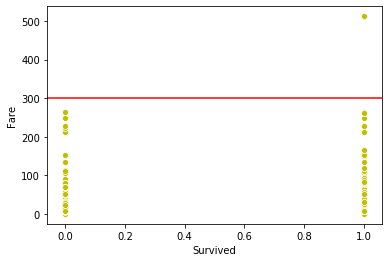

In [3]:
sns.scatterplot(data=df, x='Survived', y='Fare', color='y')
plt.axhline(y=300, color='r')

In [4]:
index_drop = df[df['Fare']>300].index
d_df = df.drop(index_drop, axis=0)
d_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
droped_feature = d_df.dropna(subset=['Embarked'])
droped_feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
droped_feature['Survived'].value_counts()

0    549
1    337
Name: Survived, dtype: int64

In [7]:
features = droped_feature.drop(['Survived'], axis=1)
target = droped_feature['Survived']
features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
category_feature = features.select_dtypes(include=['object']).copy()
numeric_feature = features.select_dtypes(include=['int64','float64']).copy()


## Work with category features

In [9]:
category_feature.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
dummy_category = pd.get_dummies(category_feature, columns=['Sex','Embarked'], drop_first=True)

In [10]:
from sklearn.feature_selection import chi2,SelectKBest,f_classif
chi2 = SelectKBest(chi2,k=2)
chi2.fit(dummy_category,target)
mask = chi2.get_support()
rcf = dummy_category.loc[:,mask]
rcf

,Sex_male,Embarked_S
0,1,1
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
886,1,1
887,0,1
888,0,1
889,1,0


## working with numerical feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0


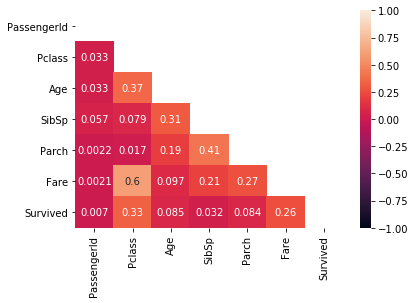

In [11]:
numeric_feature['Survived'] = target
num_cor = numeric_feature.corr().abs()
matrix = np.triu(num_cor)
sns.heatmap(num_cor, vmin=-1, vmax=1, annot=True, mask=matrix)
numeric_feature.head()

In [12]:
numeric_feature.drop(['Survived','Age'], axis=1, inplace=True)

In [13]:
fvalue = SelectKBest(f_classif,k=2)
fvalue.fit(numeric_feature, target)
mask = fvalue.get_support()
rnf = numeric_feature.loc[:,mask]
rnf

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [14]:
final_feature = pd.concat([rcf,rnf], axis=1)
final_feature['Fare'] = rnf['Fare']
final_feature

,Sex_male,Embarked_S,Pclass,Fare
0,1,1,3,7.2500
1,0,0,1,71.2833
2,0,1,3,7.9250
3,0,1,1,53.1000
4,1,1,3,8.0500
...,...,...,...,...
886,1,1,2,13.0000
887,0,1,1,30.0000
888,0,1,3,23.4500
889,1,0,1,30.0000


## handling Imbalance Dataset

In [15]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [16]:
# By under sampling method we will balance our dataset
from imblearn.under_sampling import RandomUnderSampler
u_sample = RandomUnderSampler()
x, y = u_sample.fit_resample(final_feature, target)
y.value_counts()

1    337
0    337
Name: Survived, dtype: int64

## model creating

## logistic Regression

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression(random_state=0)
scores = cross_val_score(lsr,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.7745171202809482


In [18]:
lsr.fit(x,y)

LogisticRegression(random_state=0)

## Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
rfc = RandomForestClassifier()
para = dict(max_depth=list(range(1,10)))
clf = GridSearchCV(rfc,para,cv=10,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 7}


In [21]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6)
scores = cross_val_score(rf,final_feature,target,cv=10,scoring='accuracy')
print(scores.mean())

0.8171603677221656


In [22]:
rf.fit(final_feature,target)

RandomForestClassifier(max_depth=6)

## AdaBoosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                n_estimators=100,
                                                algorithm='SAMME.R',
                                                learning_rate=1.0)
scores = cross_val_score(ada,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.7715320456540825


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(gbc,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.7715100965759437


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)
#para = dict(n_eighbors=list(range(1,30)))
#grid = GridSearchCV(knn, para, cv=10, scoring='accuracy', n_jobs=-1)
#grid.fit(final_feature, target)
#print(grid.best_params_)
scores = cross_val_score(knn,final_feature,target,cv=10,scoring='accuracy')
print(scores.mean())

0.781064862104188


In [26]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_df = test[['Pclass','Sex','Fare','Embarked']]
dummy_test = pd.get_dummies(test_df, columns=['Sex','Embarked'], drop_first=True)
x = dummy_test['Fare'].mean()
dummy_test['Fare'].fillna(x, inplace=True)
final_test = dummy_test.drop(['Embarked_Q'], axis=1)

In [28]:
pred = rf.predict(final_test)
pred

C:\Users\JANMEJAYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
data = {'PassengerId':test['PassengerId'], 'Survived':pred}
score_df = pd.DataFrame(data, columns=['PassengerId','Survived'])
score_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [33]:
score_df.to_csv('submission.csv', index=False)